# Libros

https://drive.google.com/drive/folders/1K1p6vIkeC-CyHNnSIEmHv_SA-dQ6gVZ0

# Optimizacion Sharpe via Scipy

In [5]:
import yfinance as yf
import numpy as np
from scipy import optimize

df = yf.download(['PYPL','AAPL','KO'], start='2020-01-01', end='2021-01-01')['Adj Close']
df = df.loc[~(df==0).any(axis=1)] 
ret_log = np.log((df/df.shift(1)).dropna())

[*********************100%***********************]  3 of 3 completed


In [6]:
def sharpe_neg(weights): 
    global ret_log
    weights = np.array(weights)
    ret = np.sum(ret_log.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(ret_log.cov()*252,weights)))
    sr = ret/vol 
    return -sr

In [7]:
def check_sum(weights): 
    return np.sum(weights) -1

In [8]:
cons = ({'type':'eq','fun':check_sum})
bounds = [(0.0,1)] * len(ret_log.columns)
init_guess = [0.1] * len(ret_log.columns)

opt_results = optimize.minimize(sharpe_neg, init_guess, bounds=bounds, constraints=cons)
opt_results

     fun: -1.275733379846448
     jac: array([-6.24701381e-04,  4.53920737e-01,  9.33855772e-05])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.13005477, 0.        , 0.86994523])

In [9]:
(opt_results['x'] * 100).round(2)

array([13.01,  0.  , 86.99])

# Regimenes de Sigma

In [10]:
import pandas as pd
import yfinance as yf


df = yf.download('SPY', auto_adjust=True, start='2000-01-01')
df.index = pd.to_datetime(df.index)
df['variacion'] = df.Close.pct_change() *100
df['volatilidad'] = df.variacion.rolling(250).std() * 250**0.5
df['año'] = df.index.year
df= df.dropna()
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close    Volume  \
Date                                                                   
2000-12-28   90.954943   91.682583   90.805135   91.575577   8358700   
2000-12-29   91.811009   91.960818   89.842102   89.842102   8774600   
2001-01-02   90.398526   90.505531   87.359560   88.215607   8737500   
2001-01-03   87.873177   93.137863   87.423752   92.453026  19431600   
2001-01-04   92.410245   92.774065   91.083373   91.457893   9219000   
...                ...         ...         ...         ...       ...   
2020-11-18  360.910004  361.500000  356.239990  356.279999  70591300   
2020-11-19  355.600006  358.179993  354.149994  357.779999  59940900   
2020-11-20  357.500000  357.720001  355.250000  355.329987  70417300   
2020-11-23  357.279999  358.820007  354.869995  357.459991  62668300   
2020-11-24  360.209991  363.809998  359.297607  363.220001  57135721   

            variacion  volatilidad   año  
Date                                      
2000-12-28   0.304725    23.810284  2000  
2000-12-29  -1.892944    23.563321  2000  
2001-01-02  -1.810393    23.631177  2001  
2001-01-03   4.803480    24.063928  2001  
2001-01-04  -1.076365    23.372784  2001  
...               ...          ...   ...  
2020-11-18  -1.203482    33.395070  2020  
2020-11-19   0.421017    33.396479  2020  
2020-11-20  -0.684782    33.398154  2020  
2020-11-23   0.599444    33.401874  2020  
2020-11-24   1.611372    33.434945  2020  

[5009 rows x 8 columns]

In [11]:
sigmas_por_año = df.pivot(columns='año', values='volatilidad')
sigmas_por_año

año              2000       2001  2002  2003  2004  2005  2006  2007  2008  \
Date                                                                         
2000-12-28  23.810284        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2000-12-29  23.563321        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2001-01-02        NaN  23.631177   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2001-01-03        NaN  24.063928   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2001-01-04        NaN  23.372784   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...               ...        ...   ...   ...   ...   ...   ...   ...   ...   
2020-11-18        NaN        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-11-19        NaN        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-11-20        NaN        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-11-23        NaN        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-11-24        NaN        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

año         2009  ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
Date              ...                                                         
2000-12-28   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2000-12-29   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2001-01-02   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2001-01-03   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2001-01-04   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2020-11-18   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-11-19   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-11-20   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-11-23   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-11-24   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

año              2020  
Date                   
2000-12-28        NaN  
2000-12-29        NaN  
2001-01-02        NaN  
2001-01-03        NaN  
2001-01-04        NaN  
...               ...  
2020-11-18  33.395070  
2020-11-19  33.396479  
2020-11-20  33.398154  
2020-11-23  33.401874  
2020-11-24  33.434945  

[5009 rows x 21 columns]

In [12]:
data,columns = [], []
for año in sigmas_por_año.columns:
    if len(sigmas_por_año[año].dropna()) >= 225:
        data.append(sigmas_por_año[año].dropna().iloc[:225].to_list())
        columns.append('Año '+ str(año) )
        
print(columns, data[0][:5])

['Año 2001', 'Año 2002', 'Año 2003', 'Año 2004', 'Año 2005', 'Año 2006', 'Año 2007', 'Año 2008', 'Año 2009', 'Año 2010', 'Año 2011', 'Año 2012', 'Año 2013', 'Año 2014', 'Año 2015', 'Año 2016', 'Año 2017', 'Año 2018', 'Año 2019', 'Año 2020'] [23.63117723102524, 24.063927833843074, 23.372783528721477, 23.593870552180146, 23.578698970191237]


In [13]:
pd.options.display.max_columns = 12
data_df = pd.DataFrame(data).T
data_df.columns = columns
data_df

Año 2001   Año 2002   Año 2003   Año 2004   Año 2005   Año 2006  ...  \
0    23.631177  22.016269  26.590894  16.140993  11.105829  10.352501  ...   
1    24.063928  21.969028  26.586335  16.168716  11.172703  10.350967  ...   
2    23.372784  21.907251  26.649471  16.095213  11.189717  10.349406  ...   
3    23.593871  21.375211  26.639574  16.030362  11.163504  10.370775  ...   
4    23.578699  21.350912  26.670157  16.032331  11.142253  10.347148  ...   
..         ...        ...        ...        ...        ...        ...  ...   
220  23.090349  26.008416  17.744508  11.347196  10.303523   9.959357  ...   
221  23.093351  25.988173  17.752689  11.332367  10.241751   9.955659  ...   
222  23.100251  25.993690  17.655218  11.291741  10.271733   9.945512  ...   
223  23.095017  25.987098  17.580211  11.347187  10.277412   9.938342  ...   
224  22.978307  26.044865  17.589323  11.283705  10.286205   9.924417  ...   

      Año 2015   Año 2016   Año 2017   Año 2018   Año 2019   Año 2020  
0    11.194140  15.359353  12.931980   6.705630  16.975330  11.849806  
1    11.334131  15.310380  12.704536   6.726721  17.133828  11.861931  
2    11.377275  15.260199  12.650965   6.729666  17.450357  11.835618  
3    11.440558  15.427049  12.654047   6.742462  17.467870  11.836149  
4    11.567898  15.446108  12.639443   6.742654  17.492346  11.841384  
..         ...        ...        ...        ...        ...        ...  
220  15.096175  13.871579   6.818141  14.447547  15.360235  33.348150  
221  15.095420  13.872808   6.855815  14.479419  15.373202  33.368215  
222  15.176406  13.877239   6.831755  14.480541  15.271757  33.370935  
223  15.167896  13.878813   6.831353  14.569485  15.149690  33.395070  
224  15.169594  13.897374   6.856085  14.689368  15.154089  33.396479  

[225 rows x 20 columns]

In [14]:
from numpy import linspace
from scipy.stats.kde import gaussian_kde
from bokeh.resources import INLINE
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
output_notebook(resources=INLINE)

def ridge(category, data, scale=35):
    return list(zip([category]*len(data), scale*data))

minimo  = data_df.min().min() * 0.9
maximo  = data_df.max().max() * 1.1

cats = columns
x = linspace(minimo, maximo, 500)
source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, plot_width=900, x_range=(minimo, maximo), height=600 , toolbar_location=None)

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(data_df[cat])
    y = ridge(cat, pdf(x))
    source.add(y, cat)
    p.patch('x', cat, color='darkslategrey', alpha=0.6, line_color="black", source=source)

p.background_fill_color = "#efefef"
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis.ticker
p.axis.axis_line_color = None

p.y_range.range_padding = 0.5
p.y_range.factor_padding = 2

show(p)

Loading BokehJS ...

# sigma switching general

In [15]:
tickers=  ['AMGN','UMH','MMM','NKE','MCD','KO','MRK','PG','IBM','VZ','HD','DIS','INTC','TRV','JNJ','JPM']
inicio, fin = 2017,2020

data = yf.download(tickers, start=str(inicio)+'-01-01', end=str(fin)+'-12-31', auto_adjust=True)
data = ((data['Close'].pct_change() *100).rolling(250).std() * 250**0.5).dropna()

cats = list(data.columns)
x_min, x_max = data.min().min()*0.9, data.max().max()*1.1 
x = linspace(x_min, x_max, 500)
source = ColumnDataSource(data=dict(x=x))

titulo = f"Regímenes de volatilidad tickers Dow {inicio} a {fin}"
p = figure(y_range=cats, plot_width=600, x_range=(x_min, x_max), height=580 ,title=titulo,
          tools = "hover,pan,wheel_zoom,box_zoom,reset,save")

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(data[cat])
    y = ridge(cat, pdf(x), scale=40)
    source.add(y, cat)
    p.patch('x', cat, color='black', alpha=0.3, line_color="black", source=source)

p.background_fill_color = "#E7E7E7"
p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.axis.axis_line_color = None
p.y_range.range_padding = 0.25
p.y_range.factor_padding = 3

output_notebook(resources=INLINE)
show(p)

[*********************100%***********************]  16 of 16 completed


Loading BokehJS ...

# Tests de normalidad

In [16]:
from scipy import stats
import yfinance as yf
import pandas as pd
import numpy as np

data = yf.download('AAPL', auto_adjust=True)['Close']
lista_ret = data.pct_change().dropna().to_list()
df_ret = data.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


H0 (Hipotesis nula) : Esto es una normal

H1 Hipotesis alternativa: .No normal

pvalor < 5% Se rechaza la H0


In [13]:
stats.normaltest(lista_ret)

NormaltestResult(statistic=2576.547336112887, pvalue=0.0)

<AxesSubplot:>

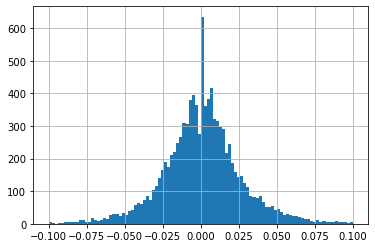

In [18]:
data.pct_change().hist(bins=100, range=(-0.1,0.1))

In [19]:
data.pct_change().kurtosis()

17.900483849956647

# Fitting

In [25]:
len(lista_ret)

10073

In [21]:
params = stats.norm.fit(lista_ret)
params

(0.001118142069798161, 0.028673374908424924)

In [24]:
stats.norm(params[0],params[1]).rvs(10)

array([ 0.01912732, -0.0039254 , -0.01029926,  0.03426024, -0.01936201,
       -0.00568098, -0.02487545, -0.0229126 ,  0.00159978,  0.00577702])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

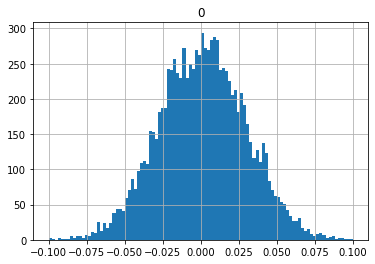

In [17]:
pd.DataFrame(stats.norm(params[0],params[1]).rvs(10000)).hist(bins=100, range=(-0.1,0.1))

In [26]:
stats.describe(stats.norm(params[0],params[1]).rvs(10000))

DescribeResult(nobs=10000, minmax=(-0.11629489553734872, 0.1269906134906306), mean=0.0018027780622300086, variance=0.000824343947216329, skewness=0.007939250248247518, kurtosis=-0.016275213276552236)

In [28]:
params = stats.johnsonsu.fit(lista_ret)
params

(-0.06350733546739554,
 1.2487545220559513,
 -0.0005947449499677639,
 0.02487547294476403)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

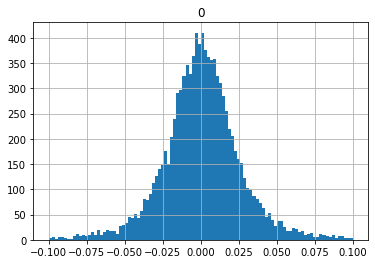

In [29]:
pd.DataFrame(stats.johnsonsu(params[0],params[1],params[2],params[3]).rvs(10000)).hist(bins=100, range=(-0.1,0.1))

In [21]:
stats.describe(stats.johnsonsu(params[0],params[1]).rvs(10000))

DescribeResult(nobs=10000, minmax=(-7.9818935000193925, 8.698794299645048), mean=0.07293120315924471, variance=1.3210379467812583, skewness=0.26635886247613233, kurtosis=5.778670167298081)

# Test Kolmogorov Smirnov

H0: la muestra A sigue una distribucion igual a la CDF B

In [31]:
df = yf.download('AAPL', start='2000-01-01', adjust_close=True)['Close']
lista_ret = np.array(np.log(df/df.shift()).dropna()) *100

# Empirico
data = pd.DataFrame(data=lista_ret, columns=['Empirico'])

# Fitting
distribuciones = {'norm': stats.norm, 'laplace': stats.laplace, 
                  'johnsonsu': stats.johnsonsu, 'dgamma': stats.dgamma,
                  'gennorm': stats.gennorm , 't':stats.t,
                  'logistic':stats.logistic,'dweibull':stats.dweibull,
                  'cauchy':stats.cauchy, 'nct': stats.nct,
                 }

parametros = {}
for nombre, distribucion in distribuciones.items():
    params = distribucion.fit(lista_ret)
    values = distribucion(params[0],params[1]).rvs(len(data))
    data[nombre] = values
    parametros[nombre] = np.array(params).round(2)
    
parametros

[*********************100%***********************]  1 of 1 completed


C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


{'norm': array([0.09, 2.66]),
 'laplace': array([0.09, 1.72]),
 'johnsonsu': array([0.01, 1.14, 0.13, 1.88]),
 'dgamma': array([1.01, 0.09, 1.7 ]),
 'gennorm': array([0.93, 0.09, 1.55]),
 't': array([2.99, 0.11, 1.58]),
 'logistic': array([0.11, 1.26]),
 'dweibull': array([0.99, 0.09, 1.71]),
 'cauchy': array([0.1, 1.1]),
 'nct': array([ 2.99, -0.01,  0.14,  1.58])}

In [33]:
stats.kstest(lista_ret, 'laplace', [0.09, 1.72])

KstestResult(statistic=0.012552089811220024, pvalue=0.37574601406034847)

In [32]:
stats.kstest(lista_ret, 'logistic', [0.11, 1.26])

KstestResult(statistic=0.040767804955154974, pvalue=4.968786137906434e-08)

In [23]:
for nombre, params in parametros.items():
    result = round(stats.kstest(lista_ret, nombre, params).pvalue,4)
    ok = ' ---OK---' if result > 0.05 else ''
    print(f'Test KS para {nombre}, {result} {ok}')


Test KS para norm, 0.0 
Test KS para laplace, 0.3757  ---OK---
Test KS para johnsonsu, 0.5656  ---OK---
Test KS para dgamma, 0.3787  ---OK---
Test KS para gennorm, 0.0377 
Test KS para t, 0.1158  ---OK---
Test KS para logistic, 0.0 
Test KS para dweibull, 0.2148  ---OK---
Test KS para cauchy, 0.0 
Test KS para nct, 0.2378  ---OK---


# Otros Tests

Tests de contrastes de distribucion / Sin parametrizar


* Jarque Bera: Solo normalidad 
* Shapiro Wilk: Solo normalidad (Para n<5000)
* Anderson-Darling (normal, exponencial, gumbel, logistica)
* Epps-Singleton (Generalizado, agnostico al modelo de distribucion subyacente)


Tests de varianzas


* Barlett: Muestras =/<> “n”, ideal para dist simil normales
* Lavenne: Muestras =/<> “n”, ideal para dist muy diferentes a normales
* Flinger Killeen: Solo = "n" ideal n bajos